In [22]:
import numpy as np
import pandas as pd
import datetime
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [23]:
df=pd.read_csv(r'downloads/AAPL.csv',index_col='Date',parse_dates=True)
df.head(7)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-17,192.899994,194.960007,192.169998,193.889999,191.603317,14669100
2019-06-18,196.050003,200.289993,195.210007,198.449997,196.109528,26551000
2019-06-19,199.679993,199.880005,197.309998,197.869995,195.536377,21124200
2019-06-20,200.369995,200.610001,198.029999,199.460007,197.107620,21514000
2019-06-21,198.800003,200.850006,198.149994,198.779999,196.435623,47800600
2019-06-24,198.539993,200.160004,198.169998,198.580002,196.237991,18220400
2019-06-25,198.429993,199.259995,195.289993,195.570007,193.263504,21070300


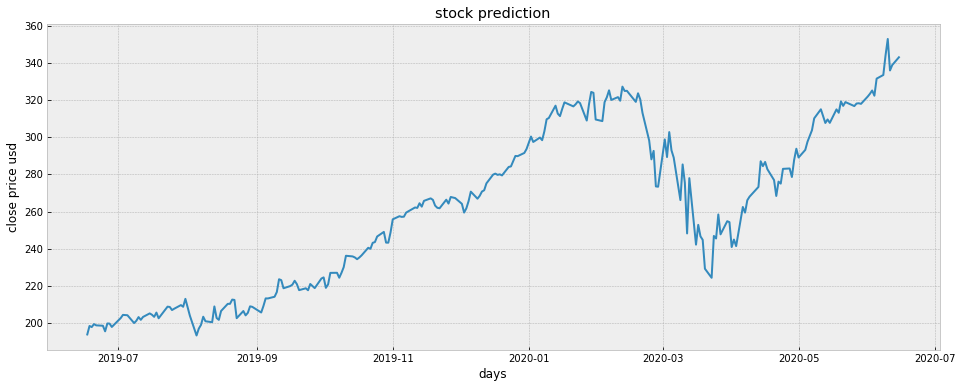

In [25]:
plt.figure(figsize=(16,6))
plt.title('stock prediction')
plt.xlabel('days')
plt.ylabel('close price usd')
plt.plot(df['Close'])
plt.show()

In [26]:
df.shape

(252, 6)

In [27]:
future_days=25
df['prediction']=df['Close'].shift(-future_days)
df.head(7)

,Open,High,Low,Close,Adj Close,Volume,prediction
Date,,,,,,,
2019-06-17,192.899994,194.960007,192.169998,193.889999,191.603317,14669100,208.839996
2019-06-18,196.050003,200.289993,195.210007,198.449997,196.109528,26551000,208.669998
2019-06-19,199.679993,199.880005,197.309998,197.869995,195.536377,21124200,207.020004
2019-06-20,200.369995,200.610001,198.029999,199.460007,197.107620,21514000,207.740005
2019-06-21,198.800003,200.850006,198.149994,198.779999,196.435623,47800600,209.679993
2019-06-24,198.539993,200.160004,198.169998,198.580002,196.237991,18220400,208.779999
2019-06-25,198.429993,199.259995,195.289993,195.570007,193.263504,21070300,213.039993


In [29]:
X=np.array(df.drop(['prediction'],1))[:-future_days]
print(X)

[[1.92899994e+02 1.94960007e+02 1.92169998e+02 1.93889999e+02
  1.91603317e+02 1.46691000e+07]
 [1.96050003e+02 2.00289993e+02 1.95210007e+02 1.98449997e+02
  1.96109528e+02 2.65510000e+07]
 [1.99679993e+02 1.99880005e+02 1.97309998e+02 1.97869995e+02
  1.95536377e+02 2.11242000e+07]
 ...
 [3.00459991e+02 3.03239990e+02 2.98869995e+02 3.00630005e+02
  2.99818390e+02 3.55834000e+07]
 [3.03220001e+02 3.05170013e+02 3.01970001e+02 3.03739990e+02
  3.02919983e+02 2.88038000e+07]
 [3.05640015e+02 3.10350006e+02 3.04290009e+02 3.10130005e+02
  3.10130005e+02 3.35120000e+07]]


In [12]:
y=np.array(df['prediction'])[:-future_days]
print(y)

[208.839996 208.669998 207.020004 207.740005 209.679993 208.779999
 213.039993 208.429993 204.020004 193.339996 197.       199.039993
 203.429993 200.990005 200.479996 208.970001 202.75     201.740005
 206.5      210.350006 210.360001 212.639999 212.460007 202.639999
 206.490005 204.160004 205.529999 209.009995 208.740005 205.699997
 209.190002 213.279999 213.259995 214.169998 216.699997 223.589996
 223.089996 218.75     219.899994 220.699997 222.770004 220.960007
 217.729996 218.720001 217.679993 221.029999 219.889999 218.820007
 223.970001 224.589996 218.960007 220.820007 227.009995 227.059998
 224.399994 227.029999 230.089996 236.210007 235.869995 235.320007
 234.369995 235.279999 236.410004 240.509995 239.960007 243.179993
 243.580002 246.580002 249.050003 243.289993 243.259995 248.759995
 255.820007 257.5      257.130005 257.23999  259.429993 260.140015
 262.200012 261.959991 264.470001 262.640015 265.76001  267.100006
 266.290009 263.190002 262.01001  261.779999 266.369995 264.29

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [31]:
tree= DecisionTreeRegressor().fit(x_train, y_train)


In [32]:
lr= LinearRegression().fit(x_train,y_train)

In [33]:
x_future=df.drop(['prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[2.42800003e+02, 2.45699997e+02, 2.38970001e+02, 2.41410004e+02,
        2.40758270e+02, 3.24700000e+07],
       [2.50899994e+02, 2.63109985e+02, 2.49380005e+02, 2.62470001e+02,
        2.61761414e+02, 5.04551000e+07],
       [2.70799988e+02, 2.71700012e+02, 2.59000000e+02, 2.59429993e+02,
        2.58729614e+02, 5.07218000e+07],
       [2.62739990e+02, 2.67369995e+02, 2.61230011e+02, 2.66070007e+02,
        2.65351715e+02, 4.22238000e+07],
       [2.68700012e+02, 2.70070007e+02, 2.64700012e+02, 2.67989990e+02,
        2.67266510e+02, 4.05291000e+07],
       [2.68309998e+02, 2.73700012e+02, 2.65829987e+02, 2.73250000e+02,
        2.72512329e+02, 3.27557000e+07],
       [2.80000000e+02, 2.88250000e+02, 2.78049988e+02, 2.87049988e+02,
        2.86275055e+02, 4.87487000e+07],
       [2.82399994e+02, 2.86329987e+02, 2.80630005e+02, 2.84429993e+02,
        2.83662140e+02, 3.27886000e+07],
       [2.87380005e+02, 2.88200012e+02, 2.82350006e+02, 2.86690002e+02,
        2.85916046e+02, 

In [34]:
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction=lr.predict(x_future)
print(lr_prediction)


[315.01001  311.410004 307.649994 309.540009 307.709991 314.959991
 313.140015 319.230011 316.850006 318.890015 317.940002 318.109985
 318.25     317.940002 321.850006 323.339996 325.119995 319.230011
 331.5      333.459991 343.98999  352.839996 335.899994 338.799988
 342.98999 ]

[290.91327548 282.28317136 287.40717183 304.77101713 307.46878997
 297.96451591 301.90085199 309.27789636 312.07727975 303.43386454
 309.90196686 290.50830137 304.87163617 302.62761912 306.8570739
 310.87437505 300.44520392 310.81089846 315.77971222 299.6903581
 307.01824516 313.30228144 320.62522893 322.56556812 348.91986667]


C:\Users\vigne\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


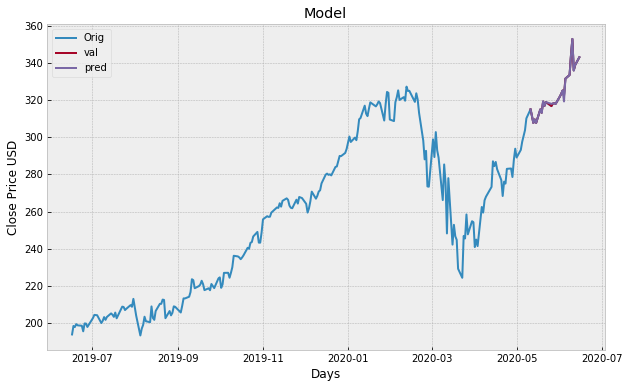

In [36]:
prediction=tree_prediction
valid=df[X.shape[0]:]
valid['prediction']=prediction
plt.figure(figsize=(10,6))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Orig','val','pred'])
plt.show()

C:\Users\vigne\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


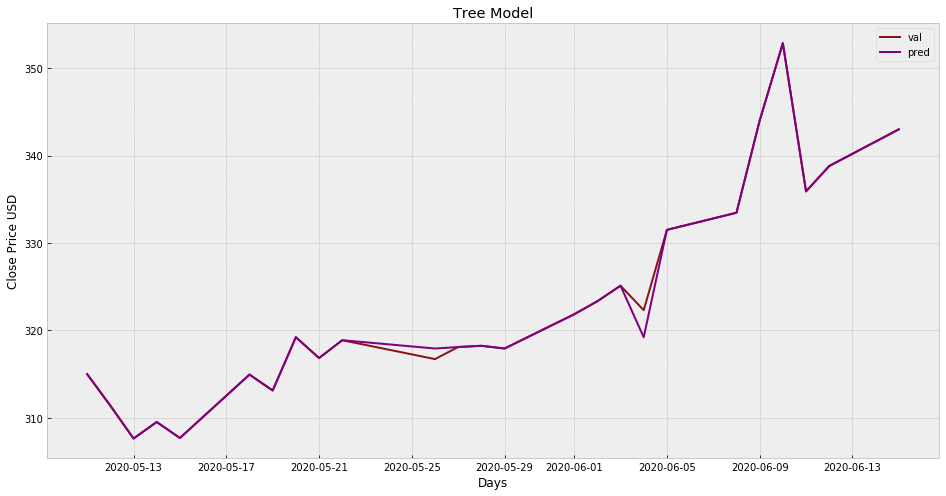

In [38]:
prediction=tree_prediction
valid=df[X.shape[0]:]
valid['prediction']=prediction
plt.figure(figsize=(16,8))
plt.title('Tree Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(valid[['Close']],color= "#8a121c")
plt.plot(valid['prediction'],color="purple")
plt.legend(['val','pred'])

C:\Users\vigne\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


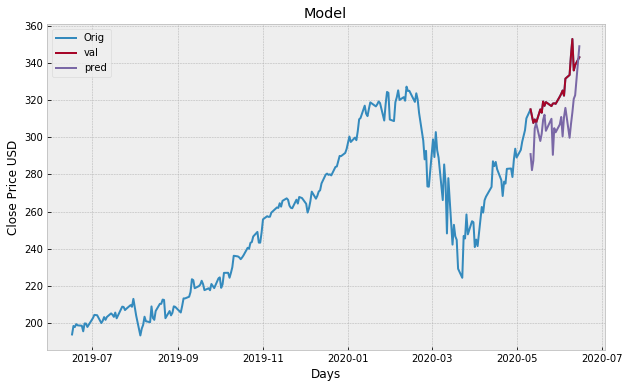

In [39]:
prediction=lr_prediction
valid=df[X.shape[0]:]
valid['prediction']=prediction
plt.figure(figsize=(10,6))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Orig','val','pred'])
plt.show()

C:\Users\vigne\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


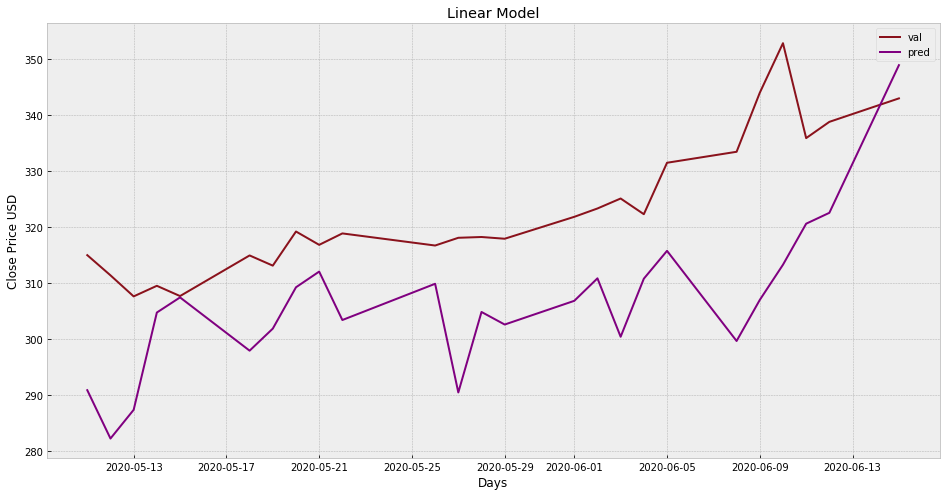

In [40]:
prediction=lr_prediction
valid=df[X.shape[0]:]
valid['prediction']=prediction
plt.figure(figsize=(16,8))
plt.title('Linear Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(valid[['Close']],color= "#8a121c")
plt.plot(valid['prediction'],color="purple")
plt.legend(['val','pred'])